In [1]:
import boto3
import glob
import pandas as pd
from dotenv import load_dotenv
from IPython.display import display
load_dotenv()

True

In [2]:
comprehend_client = boto3.client('comprehend')

In [4]:
df = pd.read_csv("sample.csv")

In [5]:
sentiments = []

for i in df['text'].tolist():
    response = comprehend_client.detect_sentiment(
        Text=i,
        LanguageCode='en'
    )
    sentiments.append(response['Sentiment'])

df['sentiment'] = sentiments

display(df.head())

,textID,text,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),sentiment
0,910d626cd8,"Come on bell, RING. I want to go outside.",noon,60-70,Moldova,4033963,32850.0,123,POSITIVE
1,8560ce3f2e,Hey,morning,0-20,Bosnia and Herzegovina,3280819,51000.0,64,NEUTRAL
2,eca4006095,"I started X-Slimmer at eight this morning, it`...",morning,46-60,Ukraine,43733762,579320.0,75,NEGATIVE
3,5b34c6a158,"no, i do better with people i don`t know yo...",noon,60-70,Libya,6871292,1759540.0,4,NEGATIVE
4,4349a49444,the end when they sing this is me and when th...,noon,60-70,Uruguay,3473730,175020.0,20,POSITIVE


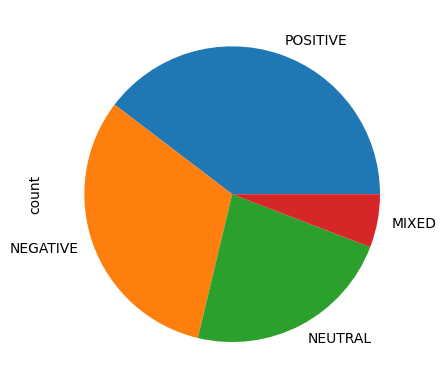

In [15]:
import matplotlib.pyplot as plt
sentiment_counts = df.value_counts("sentiment")
sentiment_counts.plot(kind="pie")
plt.savefig('sentiment_counts.jpg')


In [16]:
import awswrangler as wr
wr.s3.upload(
    local_file="sentiment_counts.jpg",
    path="s3://techcatalyst-raw/BLAKE/AI/IMAGES_PROCESSED/sentiment_counts.jpg"
)

In [17]:
wr.s3.to_parquet(
    df=df,
    path="s3://techcatalyst-raw/BLAKE/AI/IMAGES_PROCESSED/processed_sentiment_data.parquet"
)

{'paths': ['s3://techcatalyst-raw/BLAKE/AI/IMAGES_PROCESSED/processed_sentiment_data.parquet'],
 'partitions_values': {}}